# PART I:-  "EDA & Data Preprocessing on Google App Store Rating Dataset."

### 1. Import required libraries and read the dataset.

In [190]:
# Importing required libraries for handling the dataset

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Reading the given dataset

ps_data = pd.read_csv('Apps_data+(1).csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [108]:
# After reading lets load the data

ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [109]:
# lets view the shape of data

data= ps_data.shape

print('So shape attribute shows that Google playstore data has', data[0], 'rows of entries and', data[1], 'total columns')    

So shape attribute shows that Google playstore data has 10841 rows of entries and 13 total columns


In [110]:
# Looking at the info of data & understanding it

ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Inferences:-
1. Above data contains total 10841 entries & 13 columns.
2. Except 'Rating(float)' column other all columns have object datatype.
3. Also 'Rating' column have around 1474 null values out of total entries and columns 'Type', 'Content Rating', 'Current Ver' & 'Android Ver' have the least null values.

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building. 

In [111]:
# Checking out the summary statistic of the data for all variable.

ps_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inferences
The columns required to be worked on are categorical type,
1. Size
2. Installs
3. Type
4. Price
5. Content Rating

In [112]:
# Just checking the values present in the data
ps_data['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
March 20, 2014          1
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 23, 2014          1
Name: Last Updated, Length: 1378, dtype: int64

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [113]:
# to check the duplicate values in total we can do this method

ps_data.duplicated().sum()

483

In [114]:
# And this will give detailed info of the duplicate values

duplicated = ps_data[ps_data.duplicated()]

In [115]:
duplicated

# as we can it has 483 rows with duplicate values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [116]:
# So now we will drop this dulicate values
# inplace = True will drop all duplicated values from original data

ps_data.drop_duplicates(inplace = True )

In [117]:
# As we can see there were almost 500 entries which have been deleted

ps_data.shape

(10358, 13)

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [118]:
# Here we can see all the named entries in Category column

ps_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [119]:
# Now we will check for detail info of '1.9' which is shown as a unique value

check = ps_data[ps_data['Category']== '1.9']

In [120]:
check

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [121]:
# Now as we know the index number we can eassily drop it

ps_data.drop(10472, inplace = True)

In [122]:
# We can confrim whether the required unique values has droped or not

ps_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [123]:
ps_data.shape

(10357, 13)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [124]:
# First we will check for any null values present or not

null = ps_data['Rating'].isnull().sum()
print('Rating column has total ',null, 'null values')

Rating column has total  1465 null values


In [125]:
# As there are null values present, so now we can drop them

ps_data.dropna(subset= 'Rating', inplace = True)

In [126]:
# If we check now the null values are deleted
ps_data['Rating'].isnull().sum()

0

In [127]:
# Creating a new column 

ps_data['Rating_category'] = ps_data['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')

In [128]:
# As we can see below, new column has been added

ps_data['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

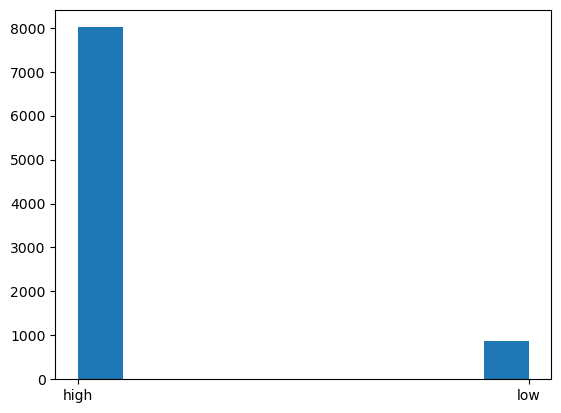

In [129]:
# Looking over the distrbution of newly created 'Rating_category' column

plt.hist(ps_data['Rating_category'],bins = 10)
plt.show()

Observation
1. As we can see here that Rating_category has maximum count of High and very minimal count of low
2. Which says that, there are around 8000 apps for high category and around 900 apps for low category which is very minute.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [130]:
# data type of Review column

ps_data['Reviews'].dtypes
# So the original dtype is object 

dtype('O')

In [131]:
# Converting the dtype of Review coulmn from object to integer

ps_data['Reviews'] = ps_data['Reviews'].astype('int')

In [132]:
ps_data['Reviews'].dtypes

dtype('int32')

In [133]:
ps_data['Reviews'].describe()

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [134]:
ps_data['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

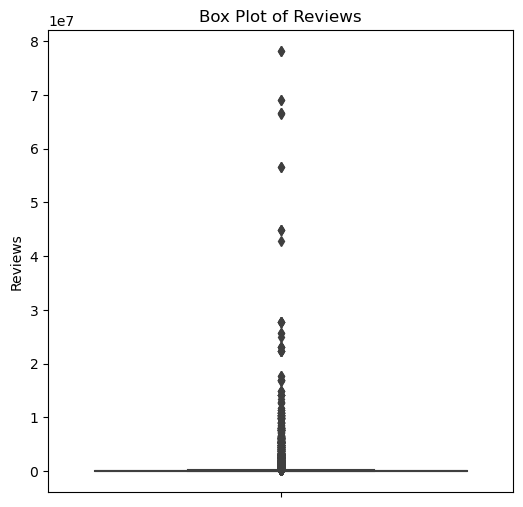

In [135]:
# Checking out the outliers using the boxplot

plt.figure(figsize=(6, 6))
sns.boxplot(data=ps_data, y='Reviews')
plt.title('Box Plot of Reviews')
plt.show()

**Observations:-**

As we can see data has too many ouliers and needs to be worked on

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [145]:
# Here we checking out the values present
ps_data['Size'].value_counts().astype(int)


Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int32

In [149]:
# Trying to repalce the unwanted data from the set by converting it into simple formate

ps_data['Size'] = ps_data['Size'].str.replace(',','')
ps_data['Size'] = ps_data['Size'].str.replace('M','000000')
ps_data['Size'] = ps_data['Size'].str.replace('k','000')

In [150]:
# Finally checking the data

ps_data['Size'].value_counts()

Varies with device    1468
14000000               154
13000000               152
12000000               151
11000000               150
                      ... 
383000                   1
454000                   1
812000                   1
442000                   1
619000                   1
Name: Size, Length: 414, dtype: int64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [137]:
# Column "Installs" has some unwanted data, lets look at it

ps_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8892, dtype: object

In [138]:
# As we know that there are unwanted values present in the data,so we can replace them

ps_data['Installs'] = ps_data['Installs'].str.replace(',','')
ps_data['Installs'] = ps_data['Installs'].str.replace('+','').astype(int)

In [139]:
# After replacing, finally we can see the converted data

ps_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8892, dtype: int32

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [140]:
# Checking out what are the grabage values present in data

ps_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [141]:
# Now replacing the garbage values 

ps_data['Price'] = ps_data['Price'].str.replace('.','')
ps_data['Price'] = ps_data['Price'].str.replace('$','').astype(int)

In [142]:
# Finally checking the dataset after taking actions 

ps_data['Price'].unique()

array([    0,   499,   399,   699,   799,   599,   299,   349,   199,
         999,   749,    99,   900,   549,  1000,  2499,  1199,  7999,
        1699,  1499,  2999,  1299,   249,  1099,   150,  1999,  1599,
        3399,  3999,   395,   449,   170,   899,   149,   388, 39999,
        1799, 40000,   302,   176,   484,   477,   161,   250,   159,
         649,   129, 29999, 37999,  3799,  1899, 38999,   849,   175,
        1400,   200,   308,   259,  1940,   390,   459,  1546,   304,
        1399,   429,   328,   460,   100,   295,   290,   197,   256,
         120])

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [151]:
#Getting all the columns of the dataset.

ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [152]:
# Dropping the redundant columns from the datset.

ps_data.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [154]:
# Viewing the top records of data after removing the dataset

ps_data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159,19000000,10000,Free,0,Everyone,high
1,ART_AND_DESIGN,967,14000000,500000,Free,0,Everyone,high
2,ART_AND_DESIGN,87510,8.7000000,5000000,Free,0,Everyone,high
3,ART_AND_DESIGN,215644,25000000,50000000,Free,0,Teen,high
4,ART_AND_DESIGN,967,2.8000000,100000,Free,0,Everyone,high


### 13. Encode the categorical columns.

In [156]:
# Checking out the Categorical columns

ps_data.describe(include = "O").T

,count,unique,top,freq
Category,8892,33,FAMILY,1718
Size,8892,414,Varies with device,1468
Type,8892,2,Free,8279
Content Rating,8892,6,Everyone,7095
Rating_category,8892,2,high,8012


#### Using Label Encoding To Encode Categorical columns.

###### 1. Category

In [159]:
# Getting count of Unique categories from Category column.

ps_data.Category.nunique()

33

In [161]:
# Creating a list of unique categories.

categories = list(ps_data["Category"].unique())

In [162]:
# Importing LabelEncoder from sklearn library

labelencoder = LabelEncoder()

In [166]:
# Transforming the Category Column using Label Encoding.

ps_data["Category"] = labelencoder.fit_transform(ps_data["Category"])
ps_data["Category"]

0         0
1         0
2         0
3         0
4         0
         ..
10834    11
10836    11
10837    11
10839     3
10840    18
Name: Category, Length: 8892, dtype: int64

In [168]:
# Checking the values of all categories after label Encoding.

ps_data.Category.value_counts()

11    1718
14    1074
29     734
25     334
12     317
23     310
6      307
18     305
24     304
20     302
28     286
4      270
15     262
27     244
21     214
30     205
26     202
3      177
31     160
7      159
8      129
19     124
9      111
13     106
32      75
1       73
16      68
17      65
0       62
5       58
22      50
10      45
2       42
Name: Category, dtype: int64

###### 2. Content Rating

In [169]:
# Getting Unique ratings from Content Rating column.

ps_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [170]:
# Transforming the Category Column using Label Encoding.

ps_data["Content Rating"] = labelencoder.fit_transform(ps_data["Content Rating"])

In [171]:
# Checking the values of all Content Rating after label Encoding.

ps_data["Content Rating"].value_counts()

1    7095
4    1022
3     411
2     360
0       3
5       1
Name: Content Rating, dtype: int64

###### 3. Type

In [172]:
# Getting Unique types from Type column.

ps_data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [173]:
# Transforming the Type Column using Label Encoding.

ps_data["Type"] = labelencoder.fit_transform(ps_data["Type"])

In [174]:
# Checking the values of all Type after label Encoding.

ps_data["Type"].value_counts()

0    8279
1     613
Name: Type, dtype: int64

###### 4.Rating Category

In [175]:
# Getting Unique categories from Rating_category column.

ps_data["Rating_category"].unique()

array(['high', 'low'], dtype=object)

In [176]:
# Transforming the Rating_category Column using Label Encoding.

ps_data["Rating_category"] = labelencoder.fit_transform(ps_data["Rating_category"])

In [177]:
# Checking the values of all Rating_category after label Encoding.

ps_data["Rating_category"].value_counts()

0    8012
1     880
Name: Rating_category, dtype: int64

### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [179]:
# Creating variable X with all Independent Variables.

X = ps_data.drop("Rating_category", axis=1)
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,159,19000000,10000,0,0,1
1,0,967,14000000,500000,0,0,1
2,0,87510,8.7000000,5000000,0,0,1
3,0,215644,25000000,50000000,0,0,4
4,0,967,2.8000000,100000,0,0,1
...,...,...,...,...,...,...,...
10834,11,7,2.6000000,500,0,0,1
10836,11,38,53000000,5000,0,0,1
10837,11,4,3.6000000,100,0,0,1
10839,3,114,Varies with device,1000,0,0,3


In [180]:
# Creating variable Y with Dependent Variable.

Y = ps_data[["Rating_category"]]
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10834,0
10836,0
10837,0
10839,0


### 15. Split the dataset into train and test.

In [182]:
#Spliting the data set into Train and Test.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [184]:
# printing the required output

print("X_train")
X_train

X_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
9624,21,47069,Varies with device,5000000,0,0,2
4058,23,10158,3.6000000,500000,0,0,1
8812,29,4908,38000000,500000,0,0,1
10593,18,40,8.0000000,1000,0,0,4
6511,12,72,2.4000000,10000,0,0,1
...,...,...,...,...,...,...,...
3448,23,115773,Varies with device,10000000,0,0,1
9433,11,85,2.1000000,10000,0,0,1
1116,12,25166,11000000,1000000,0,0,1
6039,29,1988,7.3000000,500000,0,0,1


In [185]:
print("X_test")
X_test

X_test


,Category,Reviews,Size,Installs,Type,Price,Content Rating
1222,13,1962,22000000,100000,0,0,1
2060,11,4207,26000000,100000,0,0,1
3885,14,1728557,Varies with device,50000000,0,0,1
5089,25,85,44000000,10000,0,0,1
6056,15,787,53000000,1000,1,199,1
...,...,...,...,...,...,...,...
9717,11,11,20000000,500,1,199,2
6772,4,8,2.6000000,5000,0,0,1
1690,14,4128732,Varies with device,50000000,0,0,1
3872,11,886418,6.5000000,50000000,0,0,1


In [186]:
print("Y_train")
Y_train

Y_train


,Rating_category
9624,0
4058,0
8812,1
10593,0
6511,1
...,...
3448,0
9433,1
1116,0
6039,1


In [187]:
print("Y_test")
Y_test

Y_test


,Rating_category
1222,0
2060,0
3885,0
5089,0
6056,0
...,...
9717,0
6772,0
1690,0
3872,0


### 16. Standardize the data, so that the values are within a particular range.

#### Since the columns named as Size, Installs, Price are of object data type, we need to convert the data to int dtype in order to perform Standardizing

In [211]:
# found this unique value in data so replacing it with the random value

ps_data['Size'] = ps_data['Size'].str.replace('Varies with device','19000000')

In [200]:
#defining standard scaler

scaler = StandardScaler()

In [212]:
# Performing Standardization of data

ps_data = scaler.fit_transform(ps_data)

In [213]:
ps_data

array([[-2.0332296 , -0.16269726,  0.06629284, ..., -0.05949647,
        -0.47001772, -0.33141401],
       [-2.0332296 , -0.1624191 , -0.14172536, ..., -0.05949647,
        -0.47001772, -0.33141401],
       [-2.0332296 , -0.13262691, -0.72417598, ..., -0.05949647,
        -0.47001772, -0.33141401],
       ...,
       [-0.70414943, -0.16275061, -0.72417619, ..., -0.05949647,
        -0.47001772, -0.33141401],
       [-1.67075319, -0.16271275, -0.72417634, ..., -0.05949647,
         1.49722049, -0.33141401],
       [ 0.14162887, -0.02563588,  0.06629284, ..., -0.05949647,
        -0.47001772, -0.33141401]])

In [215]:
# Converting Array's back to Pandas DataFrame.

ps_data = pd.DataFrame(ps_data)

In [216]:
ps_data

,0,1,2,3,4,5,6,7
0,-2.033230,-0.162697,0.066293,-0.190800,-0.272108,-0.059496,-0.470018,-0.331414
1,-2.033230,-0.162419,-0.141725,-0.185127,-0.272108,-0.059496,-0.470018,-0.331414
2,-2.033230,-0.132627,-0.724176,-0.133026,-0.272108,-0.059496,-0.470018,-0.331414
3,-2.033230,-0.088517,0.315915,0.387981,-0.272108,-0.059496,2.480840,-0.331414
4,-2.033230,-0.162419,-0.724176,-0.189758,-0.272108,-0.059496,-0.470018,-0.331414
...,...,...,...,...,...,...,...,...
8887,-0.704149,-0.162750,-0.724176,-0.190910,-0.272108,-0.059496,-0.470018,-0.331414
8888,-0.704149,-0.162739,1.480817,-0.190858,-0.272108,-0.059496,-0.470018,-0.331414
8889,-0.704149,-0.162751,-0.724176,-0.190915,-0.272108,-0.059496,-0.470018,-0.331414
8890,-1.670753,-0.162713,-0.724176,-0.190905,-0.272108,-0.059496,1.497220,-0.331414


# Thankyou!